In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Chandrashekar S/New Volume/Machine learning/Kaggle Competion/titanic/test.csv',index_col=['PassengerId'])
df.head()

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)
pd.set_option('display.width', 1000)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

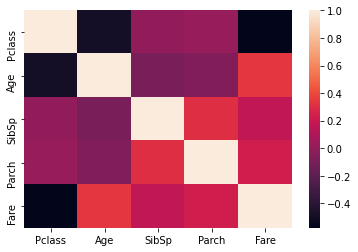

In [5]:
#df.info()
sns.heatmap(df.corr())
df.Cabin.str.get(0).value_counts()

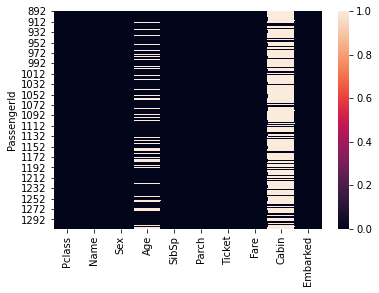

In [3]:
sns.heatmap(df.isna())

In [4]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

df["Age_tf"] = df["Age"]
df.head(2)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0


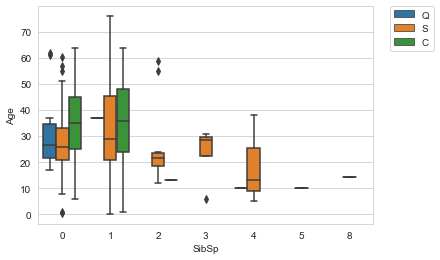

In [5]:
sns.set_style(style='whitegrid')
sns.boxplot("SibSp","Age",hue="Embarked"
            ,data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [6]:
def age_tf(sipsp,embarked,age):
    for x in df.index:
        if(np.isnan(df.Age_tf[x]) ):
            if((df.SibSp[x] == sipsp) & (df.Embarked[x] == embarked) ):
                df.Age_tf[x] = age
                #print(x)
                pass
            pass
        pass
    pass

age_tf(0,'S',29)
age_tf(0,'C',30)
age_tf(0,'Q',27)

age_tf(1,'S',31)
age_tf(1,'C',28)
age_tf(1,'Q',33)

age_tf(2,'S',24)
age_tf(2,'C',5)
age_tf(2,'Q',44)

age_tf(3,'S',10)

age_tf(4,'S',7)
age_tf(4,'Q',6)

age_tf(5,'S',11)


<ipython-input-6-c00ede17419b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Age_tf    417 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 47.0+ KB


,Age_tf,SibSp,Embarked
PassengerId,,,
1080,True,8,S


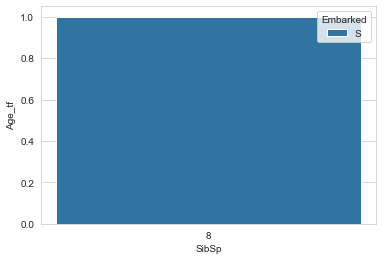

In [8]:
tr = df.Age_tf.isna()==True

Agena = df.loc[tr, ["Age_tf","SibSp",'Embarked']]


Agena.Age_tf.fillna(True,inplace=True)
sns.barplot('SibSp','Age_tf',hue="Embarked",data=Agena)
Agena
#sns.barplot("SibSp",'Age',data=df)


In [9]:
age_tf(8,'S',1)

<ipython-input-6-c00ede17419b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


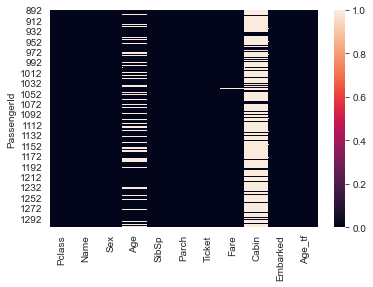

In [10]:
sns.heatmap(df.isna())

In [11]:
df.drop(columns = ['Cabin'],inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
 9   Age_tf    418 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 45.4+ KB


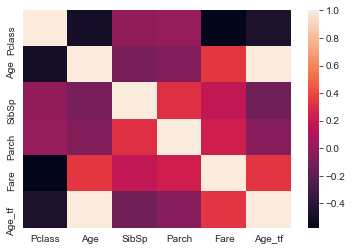

In [13]:
#sns.jointplot(x=['Age','Fare'],y='Survived',data=df)
sns.heatmap(df.corr())

In [14]:
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_tf'], dtype='object')

In [15]:
#for x in df.columns:
#    print(f'{x} : {df[x].value_counts()} \n') 

In [16]:
df.Name

PassengerId
892                                      Kelly, Mr. James
893                      Wilkes, Mrs. James (Ellen Needs)
894                             Myles, Mr. Thomas Francis
895                                      Wirz, Mr. Albert
896          Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                            Svensson, Mr. Johan Cervin
898                                  Connolly, Miss. Kate
899                          Caldwell, Mr. Albert Francis
900             Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                               Davies, Mr. John Samuel
902                                      Ilieff, Mr. Ylio
903                            Jones, Mr. Charles Cresson
904         Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                  Howard, Mr. Benjamin
906     Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907         del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                     Keane, Mr. Daniel
90

In [17]:
 names = df['Name'].str.split(',',expand=True)
df['surname'] = names[0]
df['Names'] = names[1]
#df.drop(columns = ['Name'],inplace=True)
#df.rename(columns={'Names':'Name'},inplace=True)


Marriage_status = df['Names'].str.split('.',expand=True)
df['Marriage_status'] = Marriage_status[0]
df.head()                                             

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,Names,Marriage_status
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,Kelly,Mr. James,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0,Wilkes,Mrs. James (Ellen Needs),Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0,Myles,Mr. Thomas Francis,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,27.0,Wirz,Mr. Albert,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,22.0,Hirvonen,Mrs. Alexander (Helga E Lindqvist),Mrs


In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LB = LabelEncoder()
df['Sex_tf'] = LB.fit_transform(df['Sex'])

Sex_OH =  OneHotEncoder().fit_transform(df[['Sex_tf']]).toarray()

df['gender_male'] = Sex_OH[:,1]
df['gender_female'] = Sex_OH[:,0]
df.drop(columns=['Sex_tf'],inplace=True)
df.drop(columns=['Names'],inplace=True)
df.head(1)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,Marriage_status,gender_male,gender_female
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,Kelly,Mr,1.0,0.0


In [19]:
df['Embarked_tf']= LB.fit_transform(df.Embarked)
OH_embarked = OneHotEncoder().fit_transform(df[['Embarked_tf']]).toarray()
#lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
df['Embarked_S'] = OH_embarked[:,2]
df['Embarked_Q'] = OH_embarked[:,1]
df['Embarked_C'] = OH_embarked[:,0]
df.drop(columns=['Embarked_tf'],inplace=True)
df.head()
 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,Marriage_status,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C
PassengerId,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,Kelly,Mr,1.0,0.0,0.0,1.0,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0,Wilkes,Mrs,0.0,1.0,1.0,0.0,0.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0,Myles,Mr,1.0,0.0,0.0,1.0,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,27.0,Wirz,Mr,1.0,0.0,1.0,0.0,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,22.0,Hirvonen,Mrs,0.0,1.0,1.0,0.0,0.0


In [20]:
df.info()
df.Marriage_status.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   Name             418 non-null    object 
 2   Sex              418 non-null    object 
 3   Age              332 non-null    float64
 4   SibSp            418 non-null    int64  
 5   Parch            418 non-null    int64  
 6   Ticket           418 non-null    object 
 7   Fare             417 non-null    float64
 8   Embarked         418 non-null    object 
 9   Age_tf           418 non-null    float64
 10  surname          418 non-null    object 
 11  Marriage_status  418 non-null    object 
 12  gender_male      418 non-null    float64
 13  gender_female    418 non-null    float64
 14  Embarked_S       418 non-null    float64
 15  Embarked_Q       418 non-null    float64
 16  Embarked_C       418 non-null    float64
dtypes: float64(8)

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Dr          1
 Dona        1
 Ms          1
Name: Marriage_status, dtype: int64

In [21]:
#for x in df.index:
    #print(df.Marriage_status[x])
#    if (df.Marriage_status[x] != " Mr"): # or " Miss" or " Mrs" or " Master"):
#        print(df.Marriage_status[x])
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Miss"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Mrs"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Master"):
        #df.Marriage_status[x] = 'others'
#    pass

df = pd.get_dummies(df, columns=['Marriage_status'], prefix = ['Name_prefix'])





    
#print(df.Marriage_status[x])
#df.Marriage_status.value_counts()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   Name                 418 non-null    object 
 2   Sex                  418 non-null    object 
 3   Age                  332 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 417 non-null    float64
 8   Embarked             418 non-null    object 
 9   Age_tf               418 non-null    float64
 10  surname              418 non-null    object 
 11  gender_male          418 non-null    float64
 12  gender_female        418 non-null    float64
 13  Embarked_S           418 non-null    float64
 14  Embarked_Q           418 non-null    float64
 15  Embarked_C           418 non-null    

In [23]:
#df.surname.value_counts()
#df = pd.get_dummies(df, columns=['surname'], prefix = ['surname'])
df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Dona,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,Kelly,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0,Wilkes,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0,Myles,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0


In [24]:
#codes, uniques= pd.factorize(df['surname'])

#df.head(3)

In [25]:
#sns.countplot('Embarked_tf' ,data=df_final, hue='Survived',orient='v')

In [26]:
df_final = df

df.drop(columns=['Name','Sex','Age','Ticket','Embarked','surname'],inplace=True)
df_final.head(2)

,Pclass,SibSp,Parch,Fare,Age_tf,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Dona,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,0,0,7.8292,34.5,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0
893,3,1,0,7.0000,47.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0


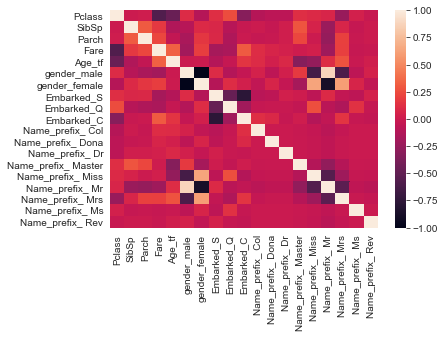

In [27]:
sns.heatmap(df_final.corr())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   SibSp                418 non-null    int64  
 2   Parch                418 non-null    int64  
 3   Fare                 417 non-null    float64
 4   Age_tf               418 non-null    float64
 5   gender_male          418 non-null    float64
 6   gender_female        418 non-null    float64
 7   Embarked_S           418 non-null    float64
 8   Embarked_Q           418 non-null    float64
 9   Embarked_C           418 non-null    float64
 10  Name_prefix_ Col     418 non-null    uint8  
 11  Name_prefix_ Dona    418 non-null    uint8  
 12  Name_prefix_ Dr      418 non-null    uint8  
 13  Name_prefix_ Master  418 non-null    uint8  
 14  Name_prefix_ Miss    418 non-null    uint8  
 15  Name_prefix_ Mr      418 non-null    

In [41]:
#sns.boxplot("Age_tf","Fare",hue="Pclass",data=df)
df.loc[1044,:]

Pclass                  3.0
SibSp                   0.0
Parch                   0.0
Fare                    NaN
Age_tf                 60.5
gender_male             1.0
gender_female           0.0
Embarked_S              1.0
Embarked_Q              0.0
Embarked_C              0.0
Name_prefix_ Col        0.0
Name_prefix_ Dona       0.0
Name_prefix_ Dr         0.0
Name_prefix_ Master     0.0
Name_prefix_ Miss       0.0
Name_prefix_ Mr         1.0
Name_prefix_ Mrs        0.0
Name_prefix_ Ms         0.0
Name_prefix_ Rev        0.0
Name: 1044, dtype: float64

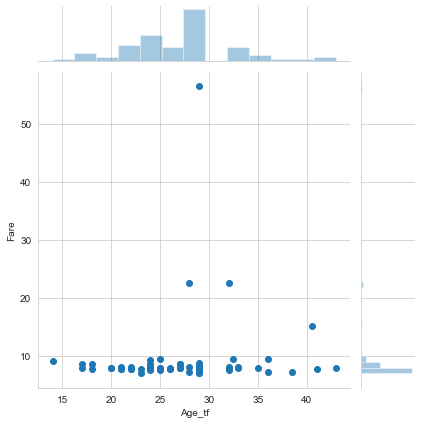

In [65]:
filt2 = (df["Pclass"]==3) & (df["Embarked_S"] ==1.0)& (df["gender_male"] ==1.0) & (df["SibSp"] ==0) & (df["Parch"] ==0)& (df["Name_prefix_ Mr"] ==1.0)
a = df.loc[filt2,["Fare","Age_tf"]]
sns.jointplot('Age_tf',"Fare",data=a)

In [72]:
df.Fare.fillna(7,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   SibSp                418 non-null    int64  
 2   Parch                418 non-null    int64  
 3   Fare                 418 non-null    float64
 4   Age_tf               418 non-null    float64
 5   gender_male          418 non-null    float64
 6   gender_female        418 non-null    float64
 7   Embarked_S           418 non-null    float64
 8   Embarked_Q           418 non-null    float64
 9   Embarked_C           418 non-null    float64
 10  Name_prefix_ Col     418 non-null    uint8  
 11  Name_prefix_ Dona    418 non-null    uint8  
 12  Name_prefix_ Dr      418 non-null    uint8  
 13  Name_prefix_ Master  418 non-null    uint8  
 14  Name_prefix_ Miss    418 non-null    uint8  
 15  Name_prefix_ Mr      418 non-null    

In [74]:
df.to_csv("titanic_test_tf3.csv")